In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.signal import butter, lfilter, freqz, detrend
from scipy.optimize import curve_fit
from sklearn import linear_model
from scipy import stats

In [3]:
sns.set()
sns.set_style('ticks')
sns.set_context('notebook')

In [41]:
df = pd.read_csv('first.csv')

In [43]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [44]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [45]:
def linear(xs, b0, b1):
    return b0 + b1*xs

def polynomial_2(xs, b0, b1, b2):
    return b0 + b1*xs + b2*xs**2

def polynomial_3(xs, b0, b1, b2, b3):
    return b0 + b1*xs + b2*xs**2 + b3*xs**3

def detrend_data(data, func):
    fitted_parms, _ = curve_fit(func, np.arange(len(data)), data)
    trend = func(np.arange(len(data)), *fitted_parms)
    detrended = [data[i]-trend[i] for i in range(0, len(data))]
    return detrended, trend

In [46]:
def norm_led(led_data, data):
    normed_led =(led_data-np.mean(led_data))/np.std(led_data)
    normed_led *= np.std(data) 
    normed_led += np.mean(data)
    return normed_led

In [47]:
order = 6
fs = 10000.0  # sampling rate in Hz
lowpass_cutoff = 10  # lowpass 7-10 Hz
highpass_cutoff = 7

unfiltered_data = df['signal[V]']
lowpass_filtered_data = butter_lowpass_filter(unfiltered_data, lowpass_cutoff, fs, order)
highpass_filtered_data = butter_highpass_filter(lowpass_filtered_data, highpass_cutoff, fs, order)

unfiltered_data = unfiltered_data[10000:]
lowpass_filtered_data = lowpass_filtered_data[10000:]
highpass_filtered_data = highpass_filtered_data[10000:]

lowpass_detrended_linear_data, linear_trend = detrend_data(lowpass_filtered_data, linear)
lowpass_detrended_poly2_data, poly2_trend = detrend_data(lowpass_filtered_data, polynomial_2)
lowpass_detrended_poly3_data, poly3_trend = detrend_data(lowpass_filtered_data, polynomial_3)

led_data=df['LED[V]'][10000:]
timepoints = df['timepoint[ms]'][10000:]/10000

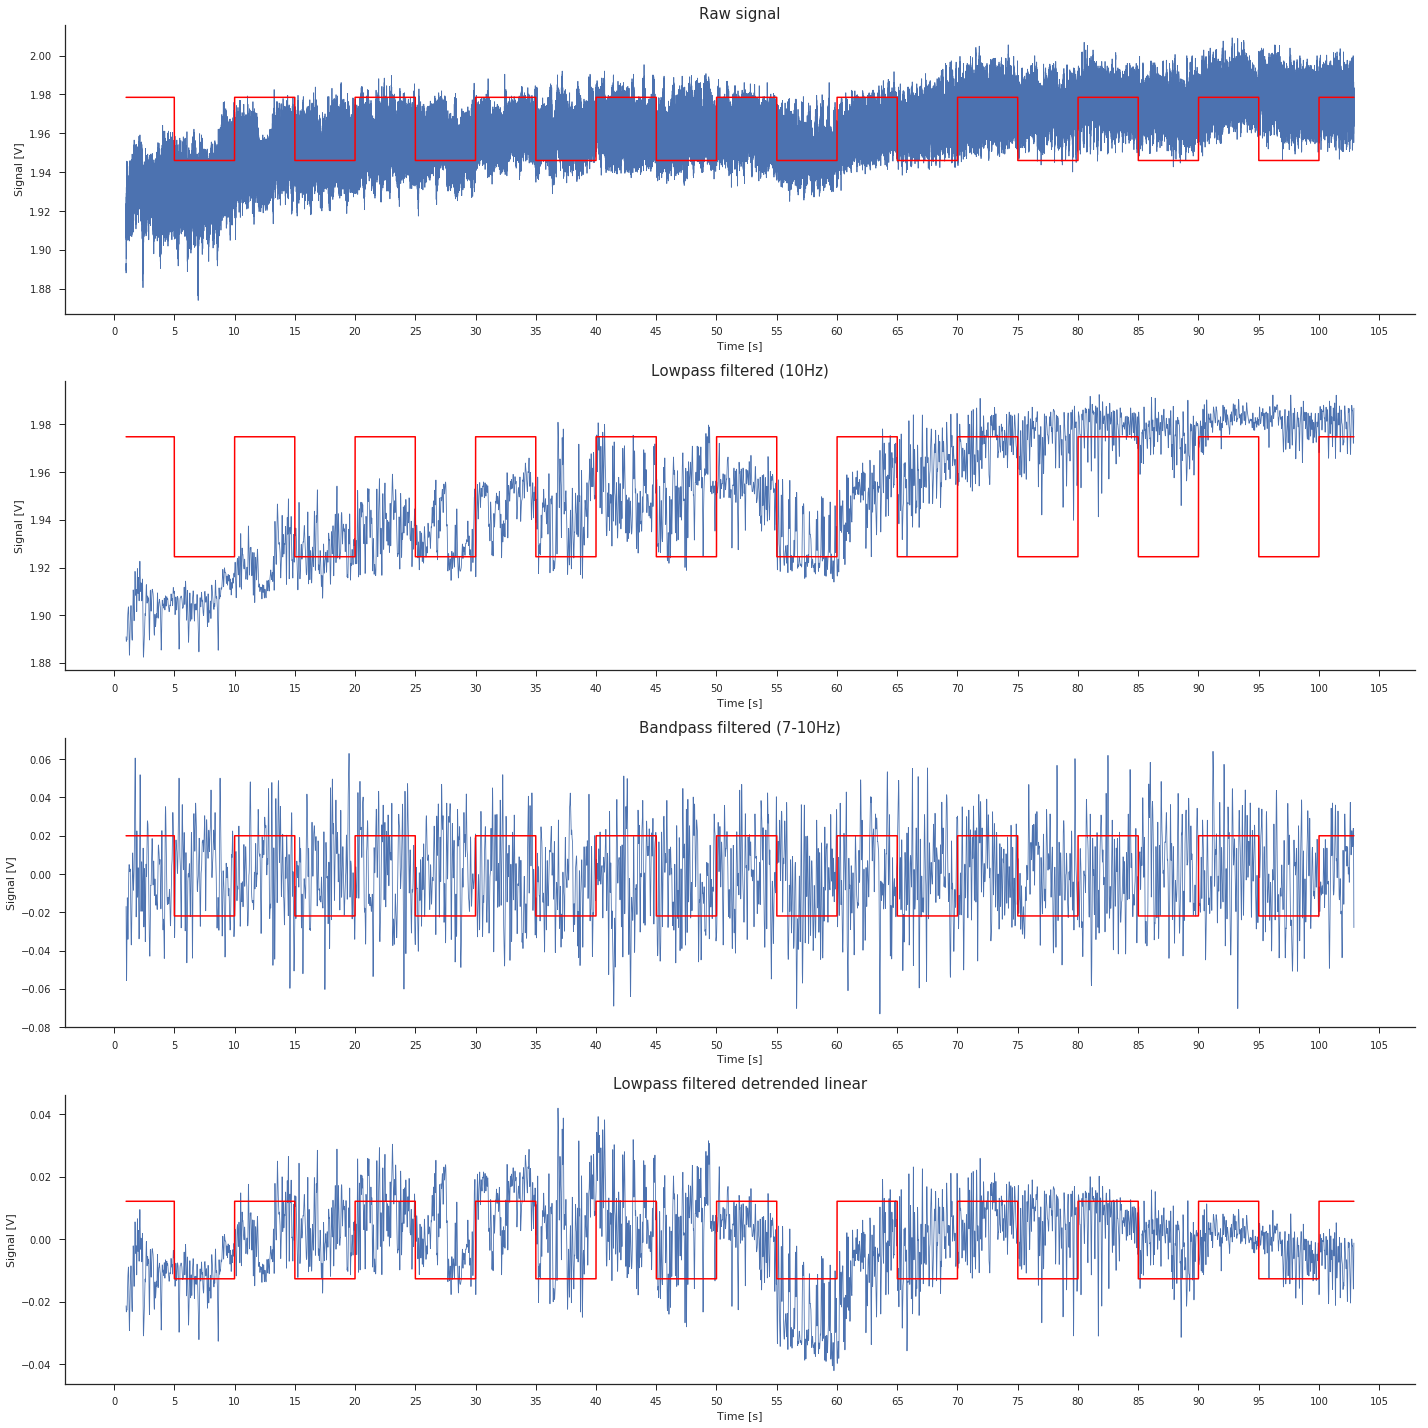

In [48]:
ticks = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105]

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(4,1,1)
ax1.set_xticks(ticks)
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Signal [V]")
ax1.set_title("Raw signal", fontsize=15)
ax1.plot(timepoints, unfiltered_data, linewidth=0.8)
ax1.plot(timepoints, norm_led(led_data, unfiltered_data), color='red', linewidth=1.5)
sns.despine()

ax2 = fig.add_subplot(4,1,2)
ax2.set_xticks(ticks)
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Signal [V]")
ax2.set_title("Lowpass filtered (10Hz)", fontsize=15)
ax2.plot(timepoints, lowpass_filtered_data, linewidth=0.8)
ax2.plot(timepoints, norm_led(led_data, lowpass_filtered_data), color='red', linewidth=1.5)
sns.despine()

ax3 = fig.add_subplot(4,1,3)
ax3.get_xaxis().get_major_formatter().set_useOffset(False)
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
ax3.set_xticks(ticks)
ax3.set_xlabel("Time [s]")
ax3.set_ylabel("Signal [V]")
ax3.set_title("Bandpass filtered (7-10Hz)", fontsize=15)
ax3.plot(timepoints, highpass_filtered_data, linewidth=0.8)
ax3.plot(timepoints, norm_led(led_data, highpass_filtered_data), color='red', linewidth=1.5)
sns.despine()

ax4 = fig.add_subplot(4,1,4)
ax4.set_xticks(ticks)
ax4.set_xlabel("Time [s]")
ax4.set_ylabel("Signal [V]")
ax4.set_title("Lowpass filtered detrended linear", fontsize=15)
ax4.plot(timepoints, lowpass_detrended_linear_data, linewidth=0.8)
ax4.plot(timepoints, norm_led(led_data, lowpass_detrended_linear_data), color='red', linewidth=1.5)
#ax4.plot(timepoints, norm_led(linear_trend, lowpass_detrended_linear_data), color='green', linewidth=1.5)
sns.despine()

#ax5 = fig.add_subplot(5,1,4)
#ax5.set_xticks(ticks)
#ax5.set_xlabel("Time [s]")
#ax5.set_ylabel("Signal [V]")
#ax5.set_title("Lowpass filtered detrended quadratic", fontsize=15)
#ax5.plot(timepoints, lowpass_detrended_poly2_data, linewidth=0.8)
#ax5.plot(timepoints, norm_led(led_data, lowpass_detrended_poly2_data), color='red', linewidth=1.5)
#ax5.plot(timepoints, norm_led(poly2_trend, lowpass_detrended_poly2_data), color='green', linewidth=1.5)
#sns.despine()

#ax6 = fig.add_subplot(5,1,5)
#ax6.set_xticks(ticks)
#ax6.set_xlabel("Time [s]")
#ax6.set_ylabel("Signal [V]")
#ax6.set_title("Lowpass filtered detrended cubic", fontsize=15)
#ax6.plot(timepoints, lowpass_detrended_poly3_data, linewidth=0.8)
#ax6.plot(timepoints, norm_led(led_data, lowpass_detrended_poly3_data), color='red', linewidth=1.5)
#ax6.plot(timepoints, norm_led(poly3_trend, lowpass_detrended_poly3_data), color='green', linewidth=1.5)
#sns.despine()


plt.tight_layout()
plt.ticklabel_format(useOffset=False)
#fig.savefig('run1_filtered.png')

In [49]:
print stats.pearsonr(led_data, unfiltered_data)[0]
print stats.pearsonr(led_data, lowpass_filtered_data)[0]
print stats.pearsonr(led_data, highpass_filtered_data)[0]
print stats.pearsonr(led_data, lowpass_detrended_linear_data)[0]

0.0696199464927
0.0850414330576
0.0159508515881
0.204723884355
